In [164]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import mstats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pickle 
# For saving the model
import warnings
warnings.filterwarnings('ignore')

In [165]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


In [166]:
from sklearn.impute import KNNImputer


In [167]:
df = pd.read_csv('projet2.csv')
df.head()

age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school     NaN      no   no  telephone   may   
2   37   services  married  high.school     NaN     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4  117   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  ...  previous     poutcome  emp.var.rate  cons.price.idx  \
0         mon  ...         0  nonexistent           1.1          93.994   
1         mon  ...         0  nonexistent           1.1          93.994   
2         mon  ...         0  nonexistent           1.1          93.994   
3         mon  ...         0  nonexistent           1.1          93.994   
4         mon  ...         0  nonexistent           1.1          93.994   

  cons.conf.idx  euribor3m  nr.employed   y   cons.idx   period  
0         -36.4   4.955546       5191.0  no -3421.3816  may_mon  
1         -36.4   4.657336       5191.0  no -3421.3816  may_mon  
2         -36.4   4.448917       5191.0  no -3421.3816  may_mon  
3         -36.4   4.474776       5191.0  no -3421.3816  may_mon  
4         -36.4   4.862300       5191.0  no -3421.3816  may_mon  

[5 rows x 23 columns]

In [168]:
df['age'].unique()

array([ 56,  57,  37,  40, 117,  45,  59,  41,  24,  25,  29,  35,  54,
        46,  50,  39,  30,  55, 108,  49,  34,  52, 111,  32,  38,  44,
        42,  60,  53,  47,  51,  48,  33,  84,  31,  43,  58,  36,  83,
       119,  28, 110,  27, 101,  26,  97,  22, 107, 112,  23,  82,  94,
       100,  90,  85, 109,  89,  20, 118,  99, 105,  91,  95,  92, 103,
        21,  80,  86,  88, 102, 104,  93,  96, 113, 106, 115,  81,  98,
        87, 116,  19, 114,  18,  70,  61,  66,  76,  67,  77,  68,  75,
        63,  73,  62,  65,  72,  64,  71,  69,  78,  79,  74,  17])

In [169]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [170]:
label_encoder = LabelEncoder()

# Fit and transform the 'job' column
df['job'] = label_encoder.fit_transform(df['job'])

# Verify the unique values in the 'job' column
print(df['job'].unique())


[ 3  7  0  1  9  5  4 10  6 11  2  8]


In [171]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [172]:
# Fit and transform the 'marital' column
df['marital'] = label_encoder.fit_transform(df['marital'])

# Verify the unique values in the 'marital' column
print(df['marital'].unique())

[1 2 0 3]


In [173]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', nan, 'university.degree',
       'illiterate'], dtype=object)

In [174]:
df['default'].unique()

array(['no', nan, 'unknown', 'yes'], dtype=object)

In [175]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [176]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [177]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [178]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [179]:
df['pdays'].unique()


array([999.,  nan,   6.,   4.,   3.,   5.,   1.,   0.,  10.,   7.,   8.,
         9.,  11.,   2.,  12.,  13.,  14.,  15.,  16.,  21.,  17.,  18.,
        22.,  25.,  19.,  27.,  20.])

In [180]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [181]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [182]:
df['y'].unique()

array(['no', nan, 'yes'], dtype=object)

In [183]:
df['period'].unique()

array(['may_mon', 'may_tue', 'may_wed', 'may_thu', 'may_fri', 'jun_mon',
       'jun_tue', 'jun_wed', 'jun_thu', 'jun_fri', 'jul_tue', 'jul_wed',
       'jul_thu', 'jul_fri', 'jul_mon', 'aug_mon', 'aug_tue', 'aug_wed',
       'aug_thu', 'aug_fri', 'oct_fri', 'oct_mon', 'oct_tue', 'oct_wed',
       'oct_thu', 'nov_mon', 'nov_tue', 'nov_wed', 'nov_thu', 'nov_fri',
       'dec_mon', 'dec_wed', 'dec_thu', 'dec_fri', 'dec_tue', 'mar_mon',
       'mar_tue', 'mar_wed', 'mar_thu', 'mar_fri', 'apr_wed', 'apr_thu',
       'apr_fri', 'apr_mon', 'apr_tue', 'sep_tue', 'sep_wed', 'sep_thu',
       'sep_fri', 'sep_mon'], dtype=object)

In [184]:
df.describe()

age          job       marital      duration      campaign  \
count  41188.000000  41188.00000  41188.000000  41188.000000  41188.000000   
mean      40.436559      3.72458      1.172769    258.285010      2.567593   
std       11.949737      3.59456      0.608902    259.279249      2.770014   
min       17.000000      0.00000      0.000000      0.000000      1.000000   
25%       32.000000      0.00000      1.000000    102.000000      1.000000   
50%       38.000000      2.00000      1.000000    180.000000      2.000000   
75%       47.000000      7.00000      2.000000    319.000000      3.000000   
max      119.000000     11.00000      3.000000   4918.000000     56.000000   

              pdays      previous  emp.var.rate  cons.price.idx  \
count  37070.000000  41188.000000  41188.000000    41188.000000   
mean     962.353116      0.172963      0.081886       93.575664   
std      187.218764      0.494901      1.570960        0.578840   
min        0.000000      0.000000     -3.400000       92.201000   
25%      999.000000      0.000000     -1.800000       93.075000   
50%      999.000000      0.000000      1.100000       93.749000   
75%      999.000000      0.000000      1.400000       93.994000   
max      999.000000      7.000000      1.400000       94.767000   

       cons.conf.idx     euribor3m   nr.employed      cons.idx  
count   41188.000000  41188.000000  41188.000000  41188.000000  
mean      -40.502600      3.622398   5199.506688  -3789.899710  
std         4.628198      1.779970    110.729797    430.323452  
min       -50.800000     -0.059403   4963.600000  -4814.163600  
25%       -42.700000      1.557479   5099.100000  -4010.298600  
50%       -41.800000      4.478135   5195.800000  -3914.400000  
75%       -36.400000      5.023249   5228.100000  -3421.381600  
max       -26.900000      5.728196   5483.747094  -2486.393900

In [185]:
df

age  job  marital            education default housing loan    contact  \
0       56    3        1             basic.4y      no      no   no  telephone   
1       57    7        1          high.school     NaN      no   no  telephone   
2       37    7        1          high.school     NaN     yes   no  telephone   
3       40    0        1             basic.6y      no      no   no  telephone   
4      117    7        1          high.school      no      no  yes  telephone   
...    ...  ...      ...                  ...     ...     ...  ...        ...   
41183   73    5        1  professional.course      no     yes   no   cellular   
41184   46    1        1  professional.course      no      no   no   cellular   
41185   56    5        1    university.degree      no     yes   no   cellular   
41186   44    9        1  professional.course      no      no   no   cellular   
41187   74    5        1                  NaN     NaN     yes   no   cellular   

      month day_of_week  ...  previous     poutcome  emp.var.rate  \
0       may         mon  ...         0  nonexistent           1.1   
1       may         mon  ...         0  nonexistent           1.1   
2       may         mon  ...         0  nonexistent           1.1   
3       may         mon  ...         0  nonexistent           1.1   
4       may         mon  ...         0  nonexistent           1.1   
...     ...         ...  ...       ...          ...           ...   
41183   nov         fri  ...         0  nonexistent          -1.1   
41184   nov         fri  ...         0  nonexistent          -1.1   
41185   nov         fri  ...         0  nonexistent          -1.1   
41186   nov         fri  ...         0  nonexistent          -1.1   
41187   nov         fri  ...         1      failure          -1.1   

       cons.price.idx cons.conf.idx  euribor3m  nr.employed    y   cons.idx  \
0              93.994         -36.4   4.955546       5191.0   no -3421.3816   
1              93.994         -36.4   4.657336       5191.0   no -3421.3816   
2              93.994         -36.4   4.448917       5191.0   no -3421.3816   
3              93.994         -36.4   4.474776       5191.0   no -3421.3816   
4              93.994         -36.4   4.862300       5191.0   no -3421.3816   
...               ...           ...        ...          ...  ...        ...   
41183          94.767         -50.8   1.549091       4963.6  yes -4814.1636   
41184          94.767         -50.8   1.680449       4963.6   no -4814.1636   
41185          94.767         -50.8   1.401760       4963.6   no -4814.1636   
41186          94.767         -50.8   0.433489       4963.6  yes -4814.1636   
41187          94.767         -50.8   1.502686       4963.6   no -4814.1636   

        period  
0      may_mon  
1      may_mon  
2      may_mon  
3      may_mon  
4      may_mon  
...        ...  
41183  nov_fri  
41184  nov_fri  
41185  nov_fri  
41186  nov_fri  
41187  nov_fri  

[41188 rows x 23 columns]

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       37070 non-null  object 
 4   default         37070 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           37070 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [187]:
df.isnull().sum()


age                  0
job                  0
marital              0
education         4118
default           4118
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays             4118
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                 4118
cons.idx             0
period               0
dtype: int64

In [188]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'cons.idx', 'period'],
      dtype='object')

In [189]:
categorical_features = df.select_dtypes(include=["object"]).columns
print("\nCategorical Features:")
print(df[categorical_features].nunique())


Categorical Features:
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
period         50
dtype: int64


In [190]:
#start data understanding

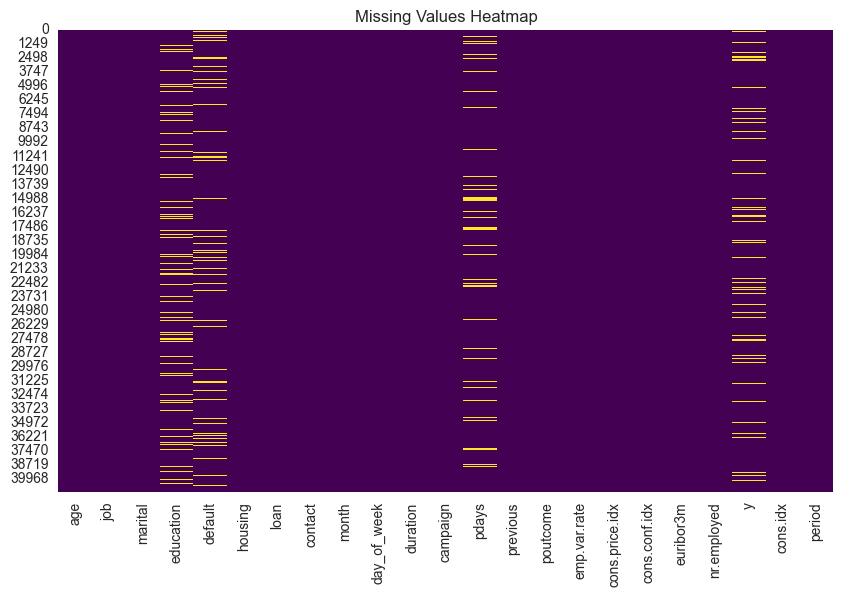

In [191]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


<H2>Converting values to be ints </H2>

In [192]:
df['age'] = df['age'].apply(lambda x: min(x, 100))  # Cap at 100

# Replace 'unknown' in categorical columns
replace_unknown_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in replace_unknown_columns:
    df[col] = df[col].replace('unknown', df[col].mode()[0])

# Handle missing values for 'education' and 'default'
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['default'] = df['default'].fillna('no')  # Assumption: default is rare

# Map 'month' to numerical values
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month'] = df['month'].map(month_mapping)

# Map 'day_of_week' to numerical values
day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
df['day_of_week'] = df['day_of_week'].map(day_mapping)

# Replace missing values for 'y'
df['y'] = df['y'].fillna(df['y'].mode()[0])  # Replace with the mode

<h2>Verification</h2>


In [193]:
df.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays             4118
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
cons.idx             0
period               0
dtype: int64

In [194]:
# Verify unique values before mapping
print(df['month'].unique())
print(df['day_of_week'].unique())

# Replace unmapped or unexpected values with mode before mapping
df['month'] = df['month'].replace(np.nan, df['month'].mode()[0])
df['day_of_week'] = df['day_of_week'].replace(np.nan, df['day_of_week'].mode()[0])

# Reapply mapping safely
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}

df['month'] = df['month'].map(month_mapping).fillna(0).astype(int)
df['day_of_week'] = df['day_of_week'].map(day_mapping).fillna(0).astype(int)
# job mapping 
job_mapping = {'admin.': 1, 'blue-collar': 2, 'entrepreneur': 3, 'housemaid': 4, 'management': 5, 'retired': 6, 'self-employed': 7, 'services': 8, 'student': 9, 'technician': 10, 'unemployed': 11}
df['job'] = df['job'].map(job_mapping).fillna(0).astype(int)

# marital mapping
marital_mapping = {'divorced': 1, 'married': 2, 'single': 3}
df['marital'] = df['marital'].map(marital_mapping).fillna(0).astype(int)
#education mapping
education_mapping = {'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4, 'illiterate': 5, 'professional.course': 6, 'university.degree': 7}
df['education'] = df['education'].map(education_mapping).fillna(0).astype(int)


# default mapping
default_mapping = {'no': 0, 'yes': 1}
df['default'] = df['default'].map(default_mapping).fillna(0).astype(int)
# housing mapping
housing_mapping = {'no': 0, 'yes': 1}
df['housing'] = df['housing'].map(housing_mapping).fillna(0).astype(int)
# loan mapping
loan_mapping = {'no': 0, 'yes': 1}
df['loan'] = df['loan'].map(loan_mapping).fillna(0).astype(int)
# contact mapping
contact_mapping = {'cellular': 1, 'telephone': 2}
df['contact'] = df['contact'].map(contact_mapping).fillna(0).astype(int)
# poutcome mapping
poutcome_mapping = {'failure': 1, 'nonexistent': 2, 'success': 3}
df['poutcome'] = df['poutcome'].map(poutcome_mapping).fillna(0).astype(int)
#y mapping
y_mapping = {'no': 0, 'yes': 1}
df['y'] = df['y'].map(y_mapping).fillna(0).astype(int)

#period mapping
# Create a mapping for the 'period' column
period_mapping = {
    'jan_mon': 1, 'jan_tue': 2, 'jan_wed': 3, 'jan_thu': 4, 'jan_fri': 5,
    'feb_mon': 6, 'feb_tue': 7, 'feb_wed': 8, 'feb_thu': 9, 'feb_fri': 10,
    'mar_mon': 11, 'mar_tue': 12, 'mar_wed': 13, 'mar_thu': 14, 'mar_fri': 15,
    'apr_mon': 16, 'apr_tue': 17, 'apr_wed': 18, 'apr_thu': 19, 'apr_fri': 20,
    'may_mon': 21, 'may_tue': 22, 'may_wed': 23, 'may_thu': 24, 'may_fri': 25,
    'jun_mon': 26, 'jun_tue': 27, 'jun_wed': 28, 'jun_thu': 29, 'jun_fri': 30,
    'jul_mon': 31, 'jul_tue': 32, 'jul_wed': 33, 'jul_thu': 34, 'jul_fri': 35,
    'aug_mon': 36, 'aug_tue': 37, 'aug_wed': 38, 'aug_thu': 39, 'aug_fri': 40,
    'sep_mon': 41, 'sep_tue': 42, 'sep_wed': 43, 'sep_thu': 44, 'sep_fri': 45,
    'oct_mon': 46, 'oct_tue': 47, 'oct_wed': 48, 'oct_thu': 49, 'oct_fri': 50,
    'nov_mon': 51, 'nov_tue': 52, 'nov_wed': 53, 'nov_thu': 54, 'nov_fri': 55,
    'dec_mon': 56, 'dec_tue': 57, 'dec_wed': 58, 'dec_thu': 59, 'dec_fri': 60
}

# Map the 'period' column to numerical values
df['period'] = df['period'].map(period_mapping).fillna(0).astype(int)

# Verify the unique values in the 'period' column
print(df['period'].unique())

# Confirm no missing values remain
print(df.isnull().sum())


[ 5  6  7  8 10 11 12  3  4  9]
[1 2 3 4 5]
[21 22 23 24 25 26 27 28 29 30 32 33 34 35 31 36 37 38 39 40 50 46 47 48
 49 51 52 53 54 55 56 58 59 60 57 11 12 13 14 15 18 19 20 16 17 42 43 44
 45 41]
age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays             4118
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
cons.idx             0
period               0
dtype: int64


In [195]:
df['month'].unique()


array([0])

In [196]:
df['pdays'].unique()


array([999.,  nan,   6.,   4.,   3.,   5.,   1.,   0.,  10.,   7.,   8.,
         9.,  11.,   2.,  12.,  13.,  14.,  15.,  16.,  21.,  17.,  18.,
        22.,  25.,  19.,  27.,  20.])

In [197]:
# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer to the 'pdays' column
df[['pdays']] = imputer.fit_transform(df[['pdays']])

# Verify that there are no missing values in 'pdays'
print(df['pdays'].isnull().sum())

0


In [198]:
df['pdays'].unique()


array([999.        , 962.35311573,   6.        ,   4.        ,
         3.        ,   5.        ,   1.        ,   0.        ,
        10.        ,   7.        ,   8.        ,   9.        ,
        11.        ,   2.        ,  12.        ,  13.        ,
        14.        ,  15.        ,  16.        ,  21.        ,
        17.        ,  18.        ,  22.        ,  25.        ,
        19.        ,  27.        ,  20.        ])

<h3>verify outliers </h3>

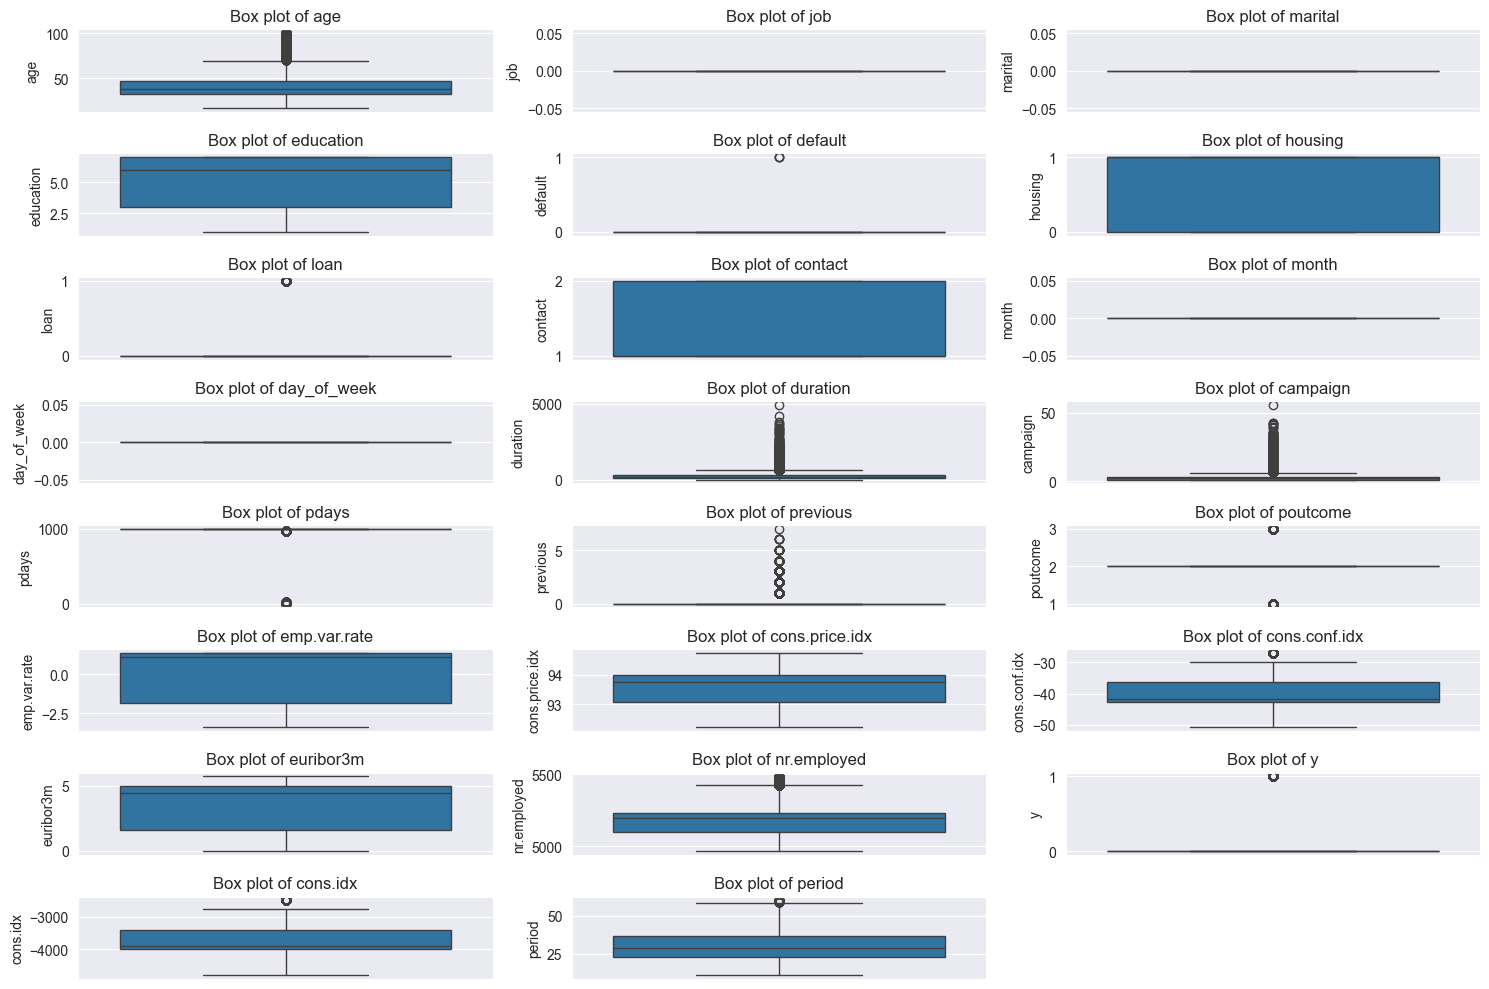

In [199]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

plt.show()

In [200]:
print(df.isnull().sum())


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
cons.idx          0
period            0
dtype: int64


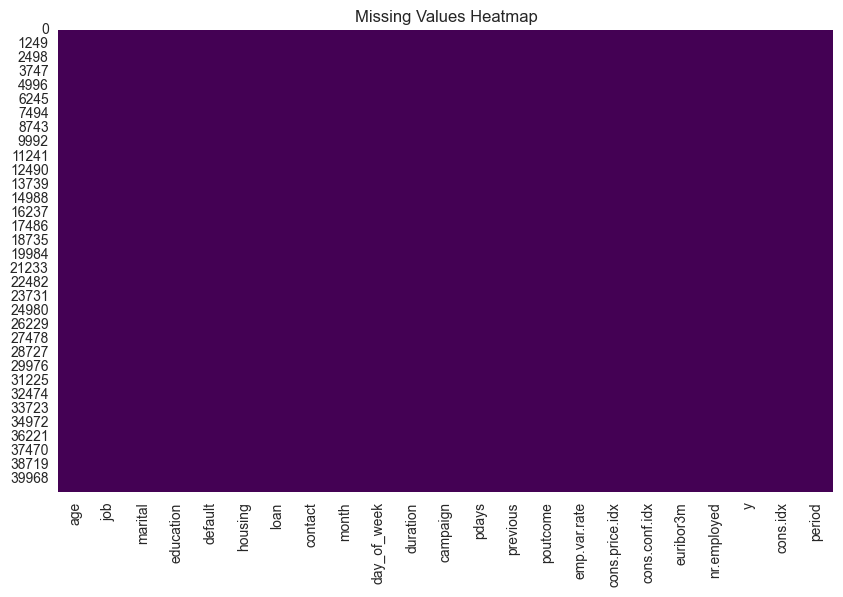

In [201]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [202]:
print(df.isnull().sum())


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
cons.idx          0
period            0
dtype: int64


In [203]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [204]:
df.head()


age  job  marital  education  default  housing  loan  contact  month  \
0   56    0        0          1        0        0     0        2      0   
1   57    0        0          4        0        0     0        2      0   
2   37    0        0          4        0        1     0        2      0   
3   40    0        0          2        0        0     0        2      0   
4  100    0        0          4        0        0     1        2      0   

   day_of_week  ...  previous  poutcome  emp.var.rate  cons.price.idx  \
0            0  ...         0         2           1.1          93.994   
1            0  ...         0         2           1.1          93.994   
2            0  ...         0         2           1.1          93.994   
3            0  ...         0         2           1.1          93.994   
4            0  ...         0         2           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y   cons.idx  period  
0          -36.4   4.955546       5191.0  0 -3421.3816      21  
1          -36.4   4.657336       5191.0  0 -3421.3816      21  
2          -36.4   4.448917       5191.0  0 -3421.3816      21  
3          -36.4   4.474776       5191.0  0 -3421.3816      21  
4          -36.4   4.862300       5191.0  0 -3421.3816      21  

[5 rows x 23 columns]

In [205]:
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Apply the function to each numerical column and store the results in a dictionary
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers_count = {column: count_outliers(df, column) for column in numerical_columns}

# Sort the columns by the number of outliers in descending order
sorted_outliers = sorted(outliers_count.items(), key=lambda item: item[1], reverse=True)

# Print the sorted columns with their outlier counts
for column, count in sorted_outliers:
    print(f"Column '{column}' has {count} outliers.")

Column 'loan' has 6248 outliers.
Column 'previous' has 5625 outliers.
Column 'poutcome' has 5625 outliers.
Column 'pdays' has 5486 outliers.
Column 'y' has 4188 outliers.
Column 'nr.employed' has 3094 outliers.
Column 'duration' has 2963 outliers.
Column 'campaign' has 2406 outliers.
Column 'age' has 839 outliers.
Column 'cons.conf.idx' has 447 outliers.
Column 'cons.idx' has 447 outliers.
Column 'period' has 69 outliers.
Column 'default' has 3 outliers.
Column 'job' has 0 outliers.
Column 'marital' has 0 outliers.
Column 'education' has 0 outliers.
Column 'housing' has 0 outliers.
Column 'contact' has 0 outliers.
Column 'month' has 0 outliers.
Column 'day_of_week' has 0 outliers.
Column 'emp.var.rate' has 0 outliers.
Column 'cons.price.idx' has 0 outliers.
Column 'euribor3m' has 0 outliers.


<h4>remove outliers/h4>

In [206]:
# Function to count outliers in a column
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Apply the function to each numerical column and store the results in a dictionary
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers_count = {column: count_outliers(df, column) for column in numerical_columns}

# Sort the columns by the number of outliers in descending order
sorted_outliers = sorted(outliers_count.items(), key=lambda item: item[1], reverse=True)

# Use Iterative Imputer or KNN Imputer for missing data
imputer = IterativeImputer() if len(df) > 1000 else KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Log-transform or Winsorize extreme outliers for highly skewed numeric variables
for column, count in sorted_outliers:
    if count > 0:
        if df_imputed[column].skew() > 1:
            df_imputed[column] = np.log1p(df_imputed[column])
        else:
            df_imputed[column] = mstats.winsorize(df_imputed[column], limits=[0.05, 0.05])

# Encode categorical variables
high_cardinality_features = ['job']  # Example of high-cardinality feature
for column in df_imputed.select_dtypes(include=['object']).columns:
    if column in high_cardinality_features:
        freq_encoding = df_imputed[column].value_counts().to_dict()
        df_imputed[column] = df_imputed[column].map(freq_encoding)
    else:
        df_imputed = pd.get_dummies(df_imputed, columns=[column], drop_first=True)

# Verify that there are no missing values
print(df_imputed.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
cons.idx          0
period            0
dtype: int64


<h1>Visualise Data based on graphical </h1>
<h3> KMeans Clustering </h3>


In [207]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

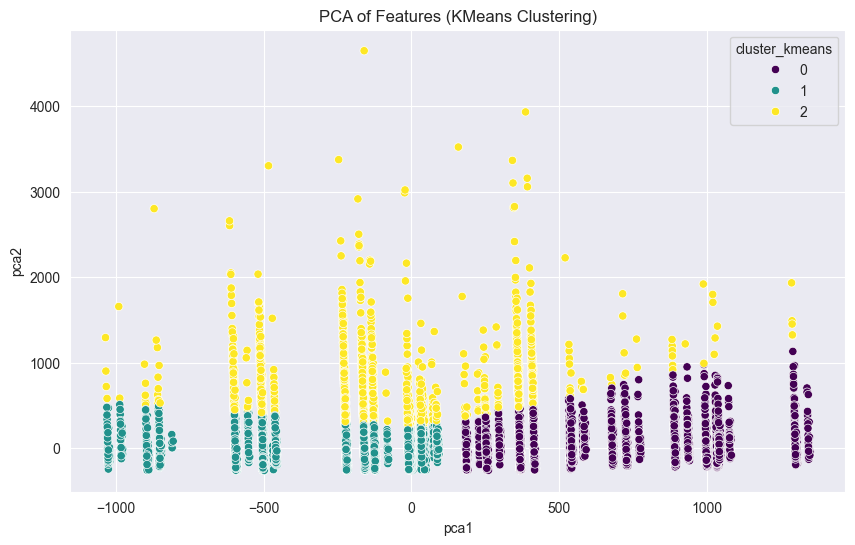

In [208]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster_kmeans'] = kmeans.fit_predict(df.select_dtypes(include=['float64', 'int64']))

# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df.select_dtypes(include=['float64', 'int64']))
df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_kmeans', data=df, palette='viridis')
plt.title('PCA of Features (KMeans Clustering)')
plt.show()

<h3>CAH Agglomerative Clustering</h3>

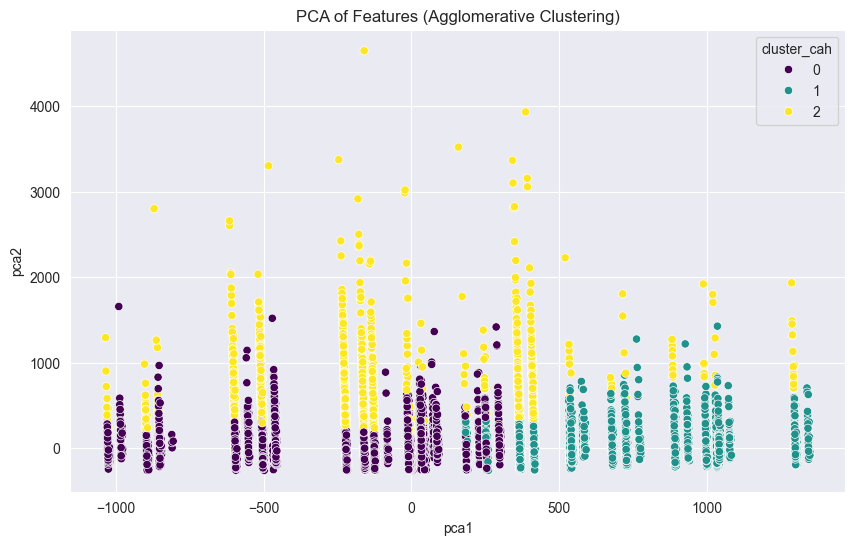

In [209]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering
cah = AgglomerativeClustering(n_clusters=3)
df['cluster_cah'] = cah.fit_predict(df.select_dtypes(include=['float64', 'int64']))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_cah', data=df, palette='viridis')
plt.title('PCA of Features (Agglomerative Clustering)')
plt.show()

<h3> DBSCAN Clustering</h3>

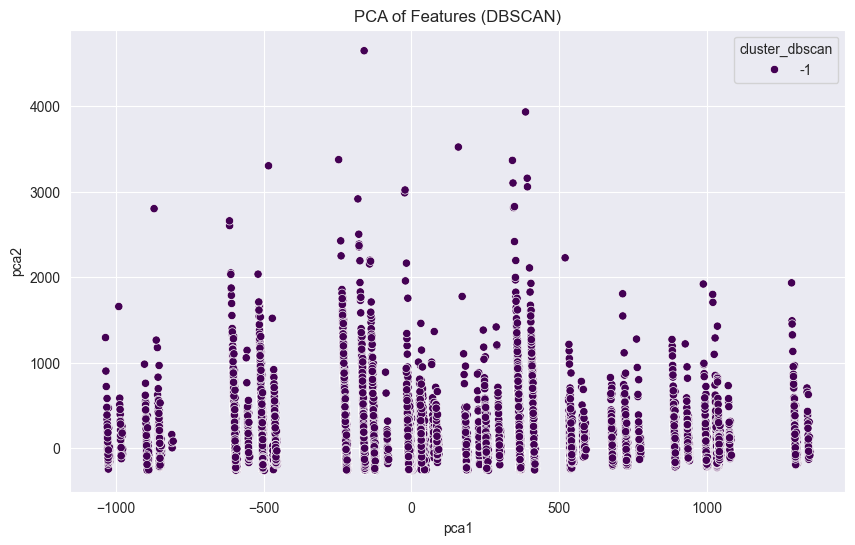

In [210]:
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(df.select_dtypes(include=['float64', 'int64']))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_dbscan', data=df, palette='viridis')
plt.title('PCA of Features (DBSCAN)')
plt.show()

<h2>Supervised Techniques</h2>
<h3>Random Forest Classifier</h3>

In [211]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Assuming df_imputed is your DataFrame and y is the target variable
X = df_imputed.drop(['y'], axis=1)
y = df_imputed['y']

# Convert continuous target to discrete classes
threshold = 0.5
y = (y > threshold).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

Random Forest Classifier:
[[10790   307]
 [  795   465]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11097
           1       0.60      0.37      0.46      1260

    accuracy                           0.91     12357
   macro avg       0.77      0.67      0.70     12357
weighted avg       0.90      0.91      0.90     12357

ROC AUC Score: 0.6706912421632616


<h3>Decision Tree Classifier</h3>

In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Split the data
# if cluster cah exists run this : X = df.drop(['y', 'cluster_kmeans', 'cluster_cah', 'cluster_dbscan', 'pca1', 'pca2'], axis=1)
X = df.drop(['y', 'cluster_kmeans', 'cluster_dbscan', 'pca1', 'pca2'], axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_dt))

Decision Tree Classifier:
[[10370   727]
 [  679   581]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     11097
           1       0.44      0.46      0.45      1260

    accuracy                           0.89     12357
   macro avg       0.69      0.70      0.69     12357
weighted avg       0.89      0.89      0.89     12357

ROC AUC Score: 0.6977989546724341


<h3>Gradient Boosting Classifier</h3>

In [213]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=0)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classifier:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb))

XGBoost Classifier:
[[10718   379]
 [  720   540]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11097
           1       0.59      0.43      0.50      1260

    accuracy                           0.91     12357
   macro avg       0.76      0.70      0.72     12357
weighted avg       0.90      0.91      0.90     12357

ROC AUC Score: 0.6972090268927252


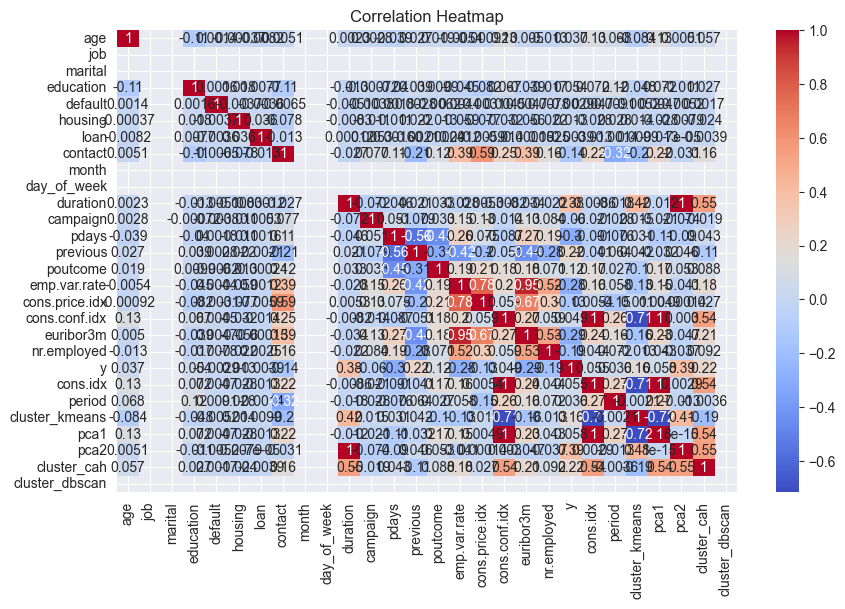

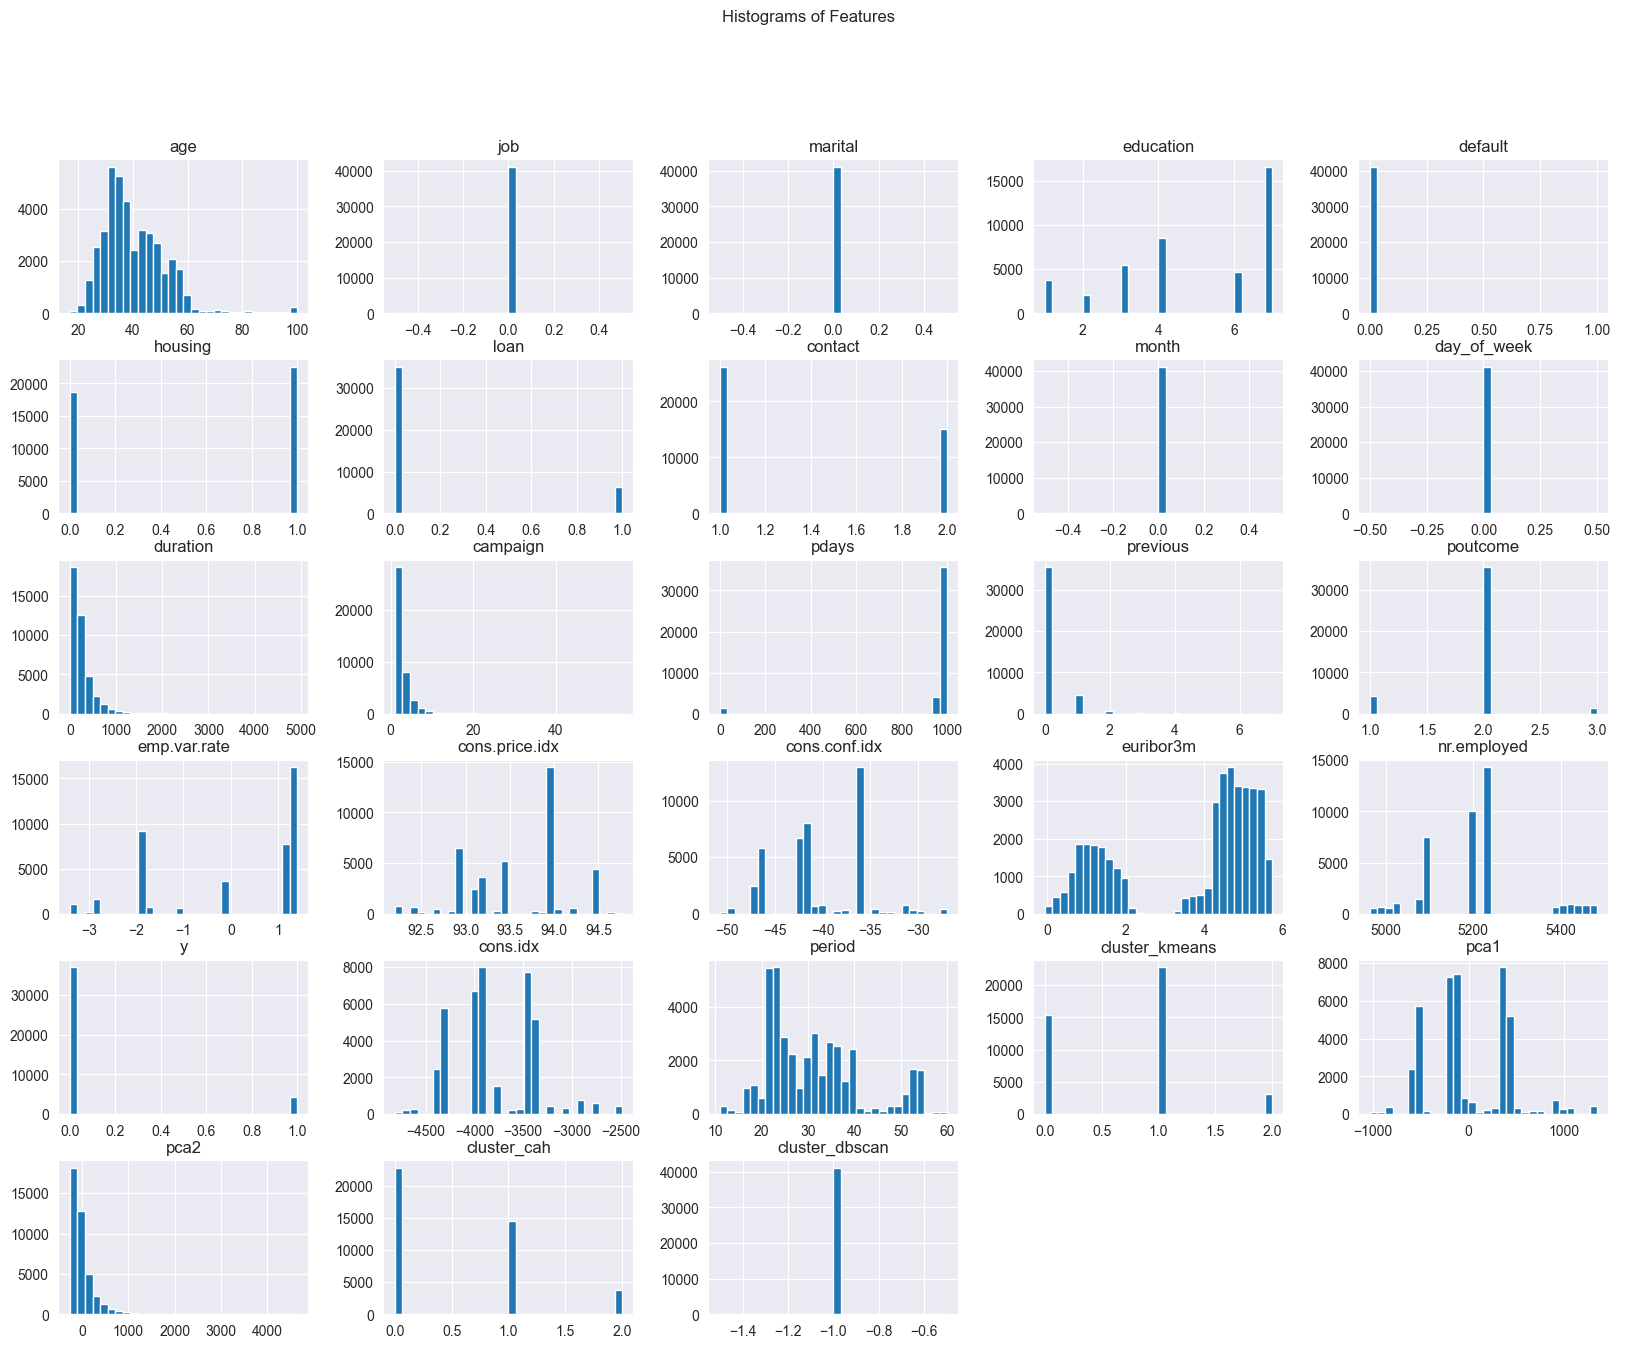

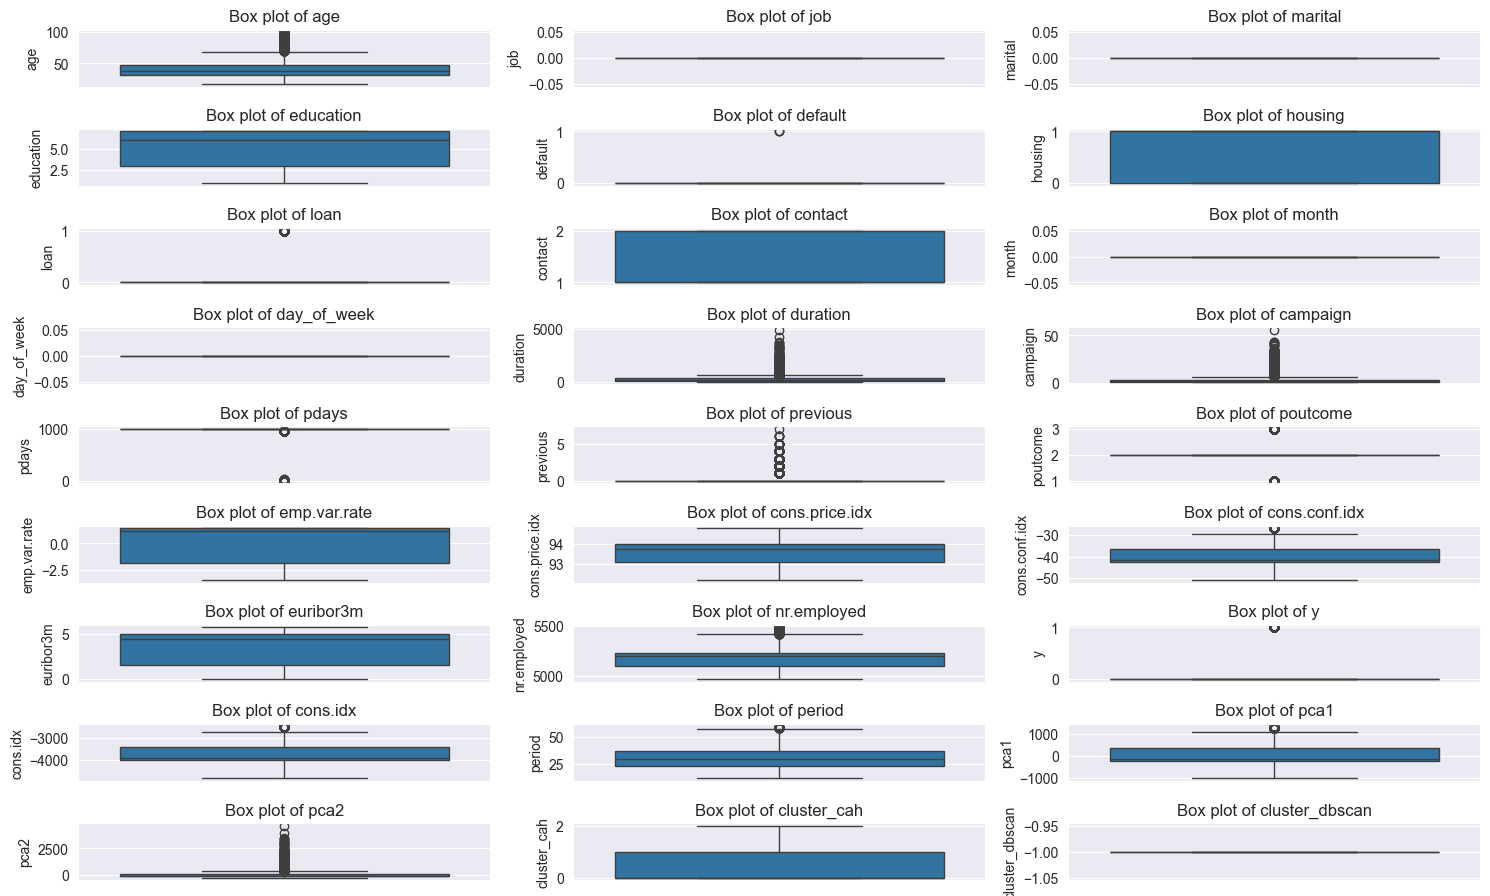

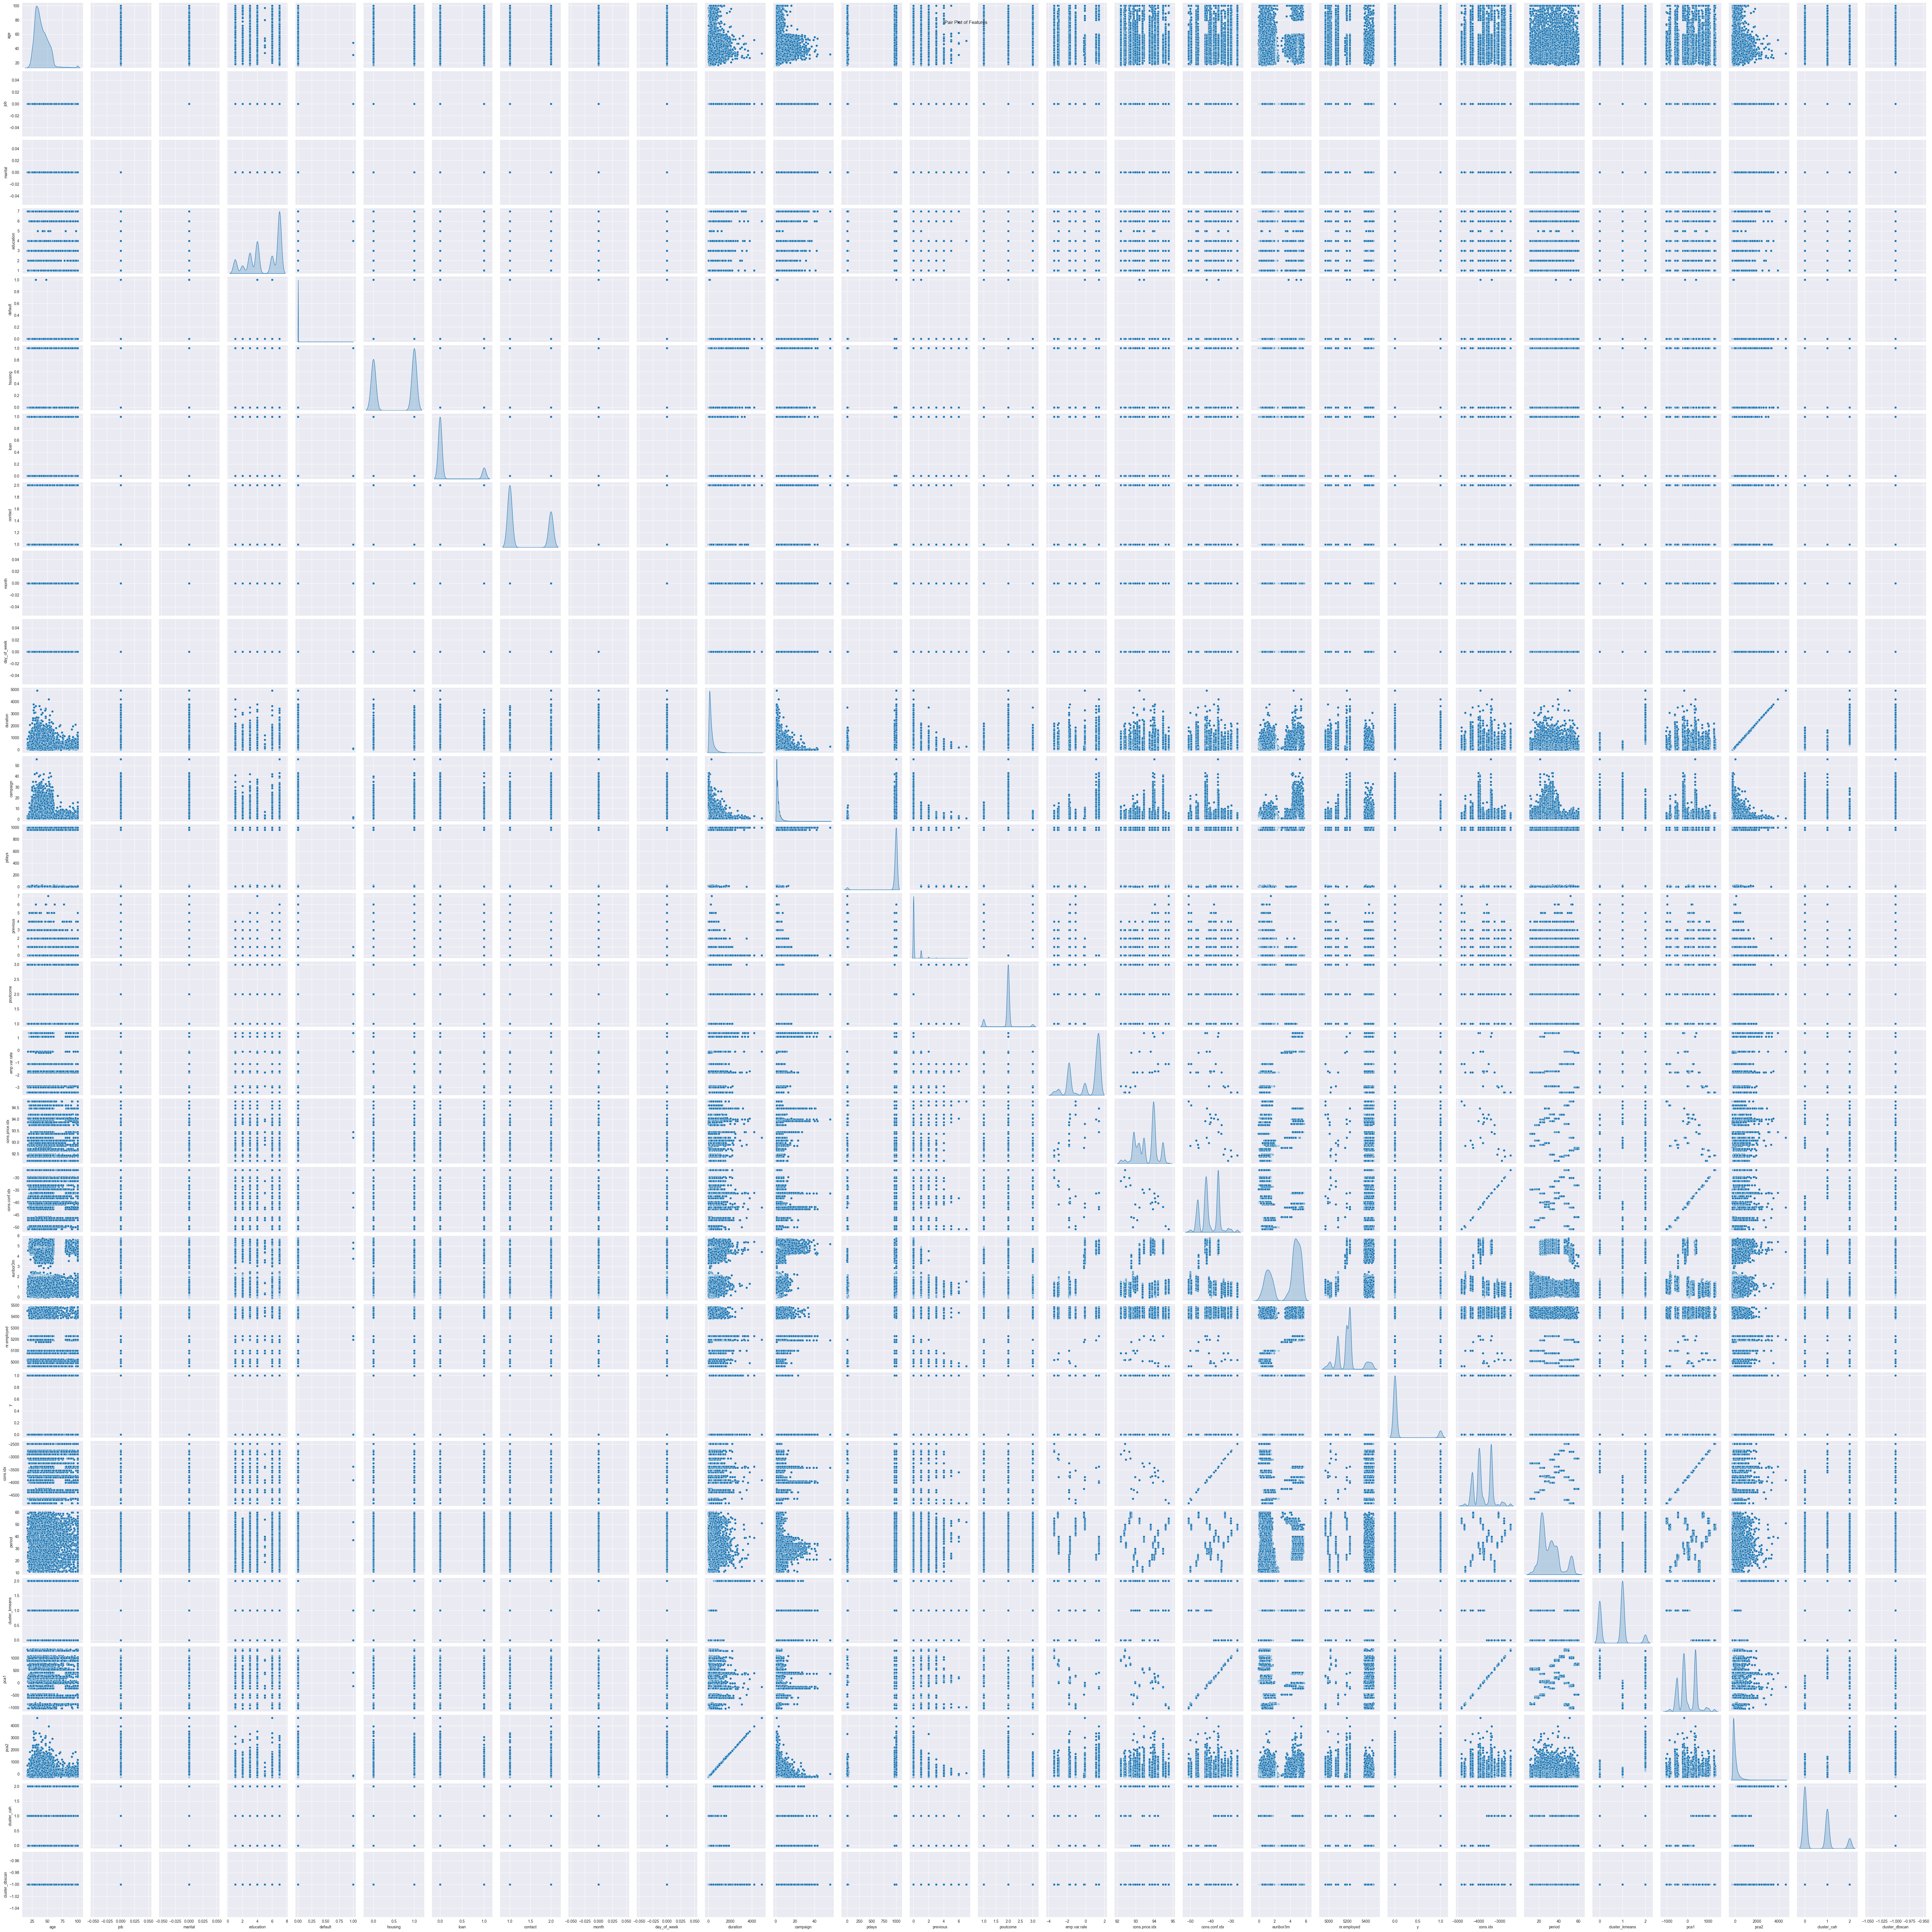

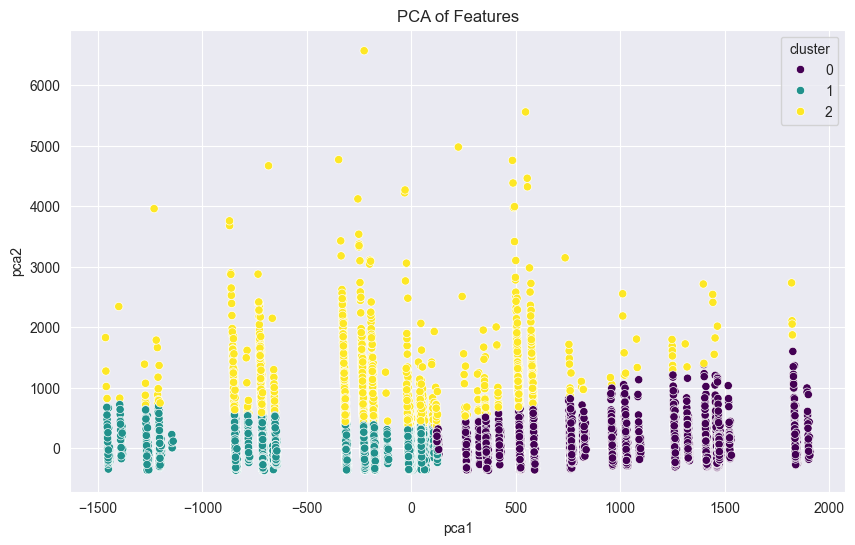

Random Forest Classifier:
[[10768   329]
 [  746   514]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11097
           1       0.61      0.41      0.49      1260

    accuracy                           0.91     12357
   macro avg       0.77      0.69      0.72     12357
weighted avg       0.90      0.91      0.91     12357

ROC AUC Score: 0.6891444277089045
Gradient Boosting Classifier:
[[10796   301]
 [  768   492]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11097
           1       0.62      0.39      0.48      1260

    accuracy                           0.91     12357
   macro avg       0.78      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357

ROC AUC Score: 0.6816758712135841


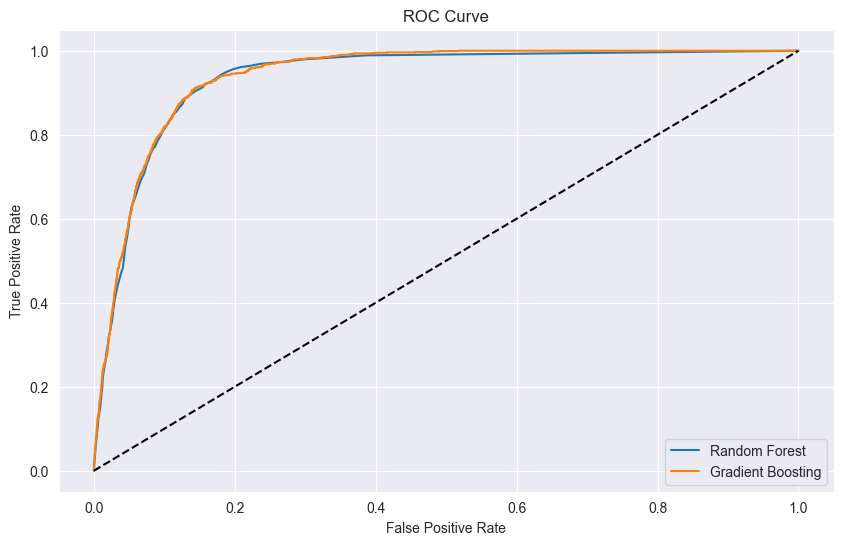

In [214]:
# Visualize the data
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Histograms
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Features')
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(len(df.select_dtypes(include=['float64', 'int64']).columns) // 3 + 1, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()
plt.show()

# Pair plot
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot of Features')
plt.show()

# Unsupervised Techniques
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df.select_dtypes(include=['float64', 'int64']))

# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df.select_dtypes(include=['float64', 'int64']))
df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis')
plt.title('PCA of Features')
plt.show()

# Supervised Techniques
# Split the data
X = df.drop(['y', 'cluster', 'pca1', 'pca2'], axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate the models
print("Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

print("Gradient Boosting Classifier:")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_gb))

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Random Forest Classifier:
[[10739   358]
 [  712   548]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11097
           1       0.60      0.43      0.51      1260

    accuracy                           0.91     12357
   macro avg       0.77      0.70      0.73     12357
weighted avg       0.90      0.91      0.91     12357

ROC AUC Score: 0.7013298317434571
Gradient Boosting Classifier:
[[10800   297]
 [  752   508]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11097
           1       0.63      0.40      0.49      1260

    accuracy                           0.92     12357
   macro avg       0.78      0.69      0.72     12357
weighted avg       0.90      0.92      0.91     12357

ROC AUC Score: 0.6882053064534815
Stacking Classifier:
[[10772   325]
 [  740   520]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11097

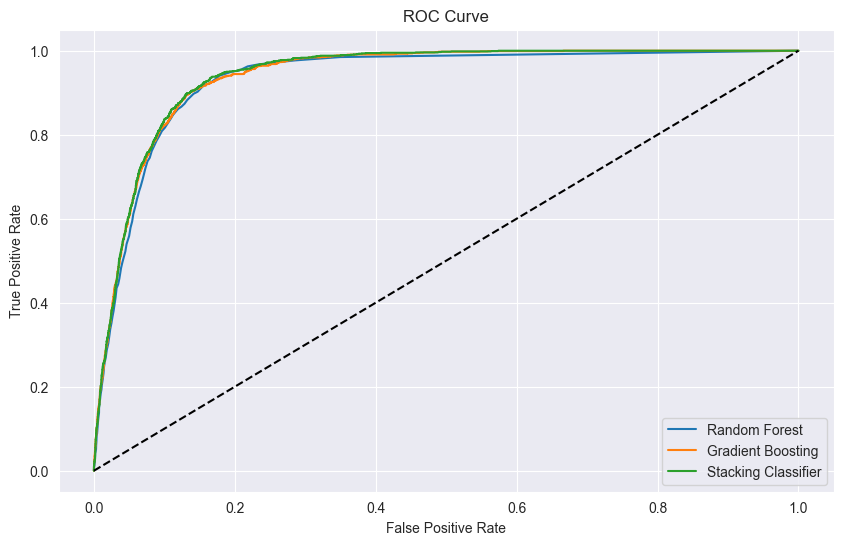

In [216]:
X = df.drop(['y'], axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Train StackingClassifier
estimators = [
    ('rf', RandomForestClassifier(random_state=0)),
    ('gb', GradientBoostingClassifier(random_state=0))
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate the models
print("Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

print("Gradient Boosting Classifier:")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_gb))

print("Stacking Classifier:")
print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_stacking))

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
fpr_stacking, tpr_stacking, _ = roc_curve(y_test, stacking_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot(fpr_stacking, tpr_stacking, label='Stacking Classifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<H1>Modeling</H1>


In [217]:
print(y.unique())

[0 1]


Random Forest Classifier:
[[10772   325]
 [  761   499]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11097
           1       0.61      0.40      0.48      1260

    accuracy                           0.91     12357
   macro avg       0.77      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357

ROC AUC Score: 0.6833722756472148


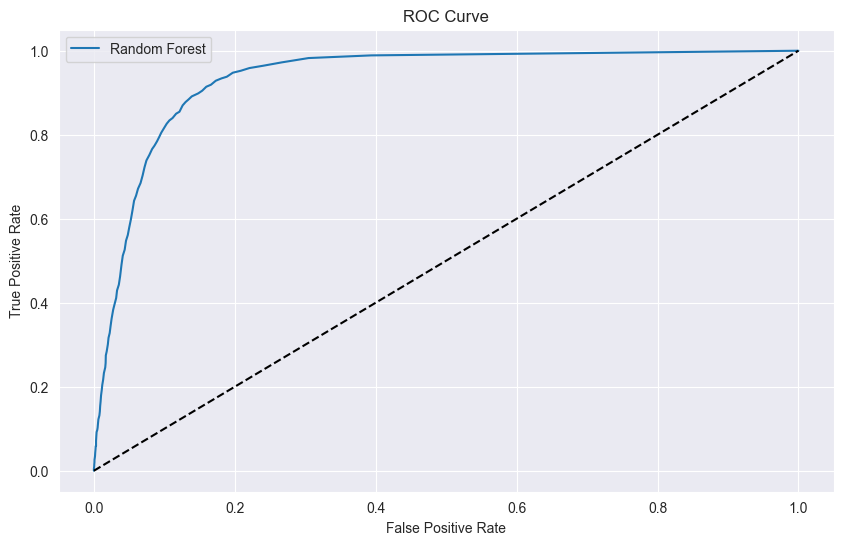

In [218]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Convert continuous target to discrete classes
threshold = 0.5
y = (y > threshold).astype(int)

# Split the data
X = df.drop(['y', 'cluster_kmeans', 'cluster_dbscan', 'pca1', 'pca2'], axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Random Forest Classifier:
[[10790   307]
 [  795   465]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11097
           1       0.60      0.37      0.46      1260

    accuracy                           0.91     12357
   macro avg       0.77      0.67      0.70     12357
weighted avg       0.90      0.91      0.90     12357

ROC AUC Score: 0.6706912421632616
Gradient Boosting Classifier:
[[10797   300]
 [  796   464]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11097
           1       0.61      0.37      0.46      1260

    accuracy                           0.91     12357
   macro avg       0.77      0.67      0.71     12357
weighted avg       0.90      0.91      0.90     12357

ROC AUC Score: 0.6706098173251458
Stacking Classifier:
[[10786   311]
 [  741   519]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11097

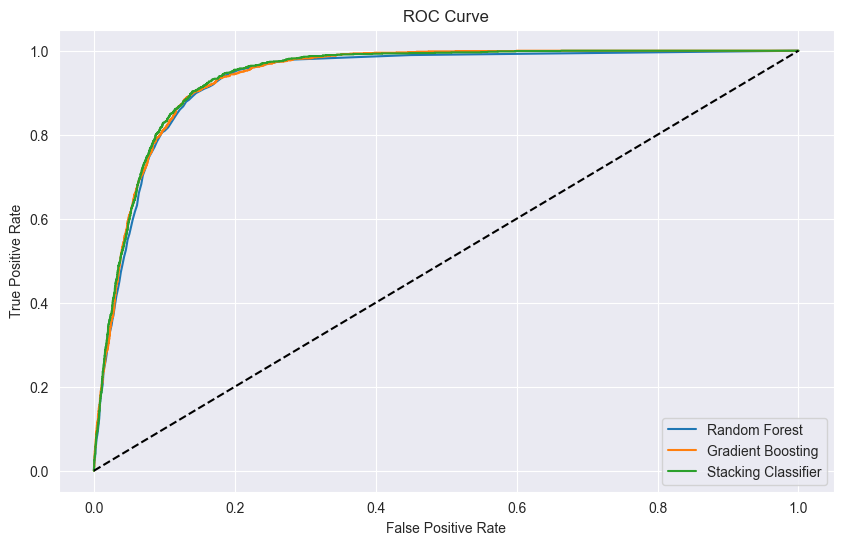

In [219]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming df_imputed is your DataFrame and y is the target variable
X = df_imputed.drop(['y'], axis=1)
y = df_imputed['y']

# Convert continuous target to discrete classes if necessary
if y.dtype == 'float64' or y.dtype == 'float32':
    threshold = 0.5
    y = (y > threshold).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Train StackingClassifier
estimators = [
    ('rf', RandomForestClassifier(random_state=0)),
    ('gb', GradientBoostingClassifier(random_state=0))
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate the models
print("Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

print("Gradient Boosting Classifier:")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_gb))

print("Stacking Classifier:")
print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_stacking))

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
fpr_stacking, tpr_stacking, _ = roc_curve(y_test, stacking_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot(fpr_stacking, tpr_stacking, label='Stacking Classifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

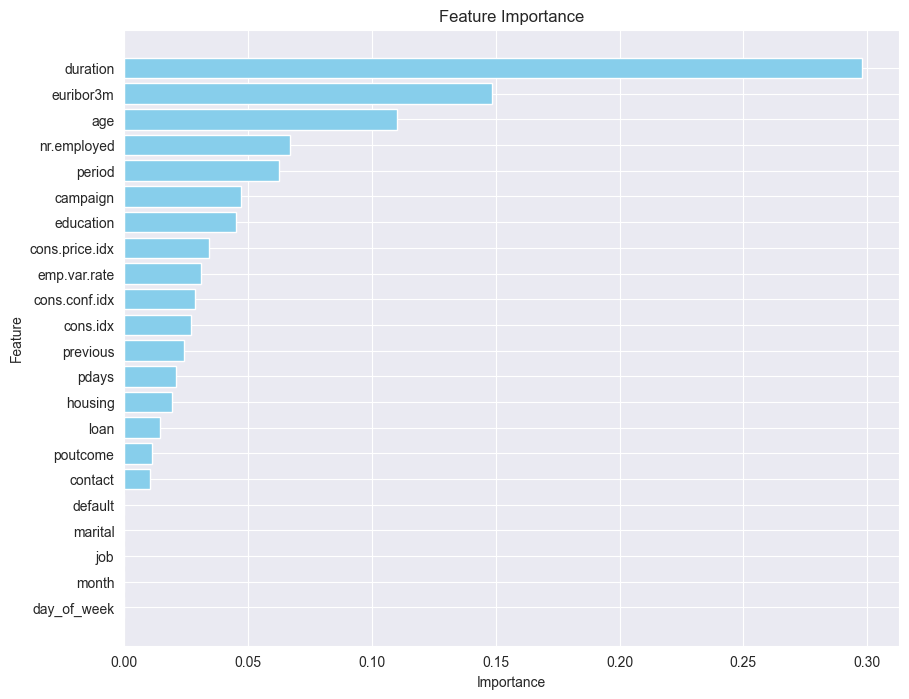

In [220]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming rf_model is your trained RandomForestClassifier and X_train is your training data
feature_importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [221]:
import pickle

# Save the trained model
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)